<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_with_Tensorflow_KERAS_CNN_and_DNN(ALL%20MODELS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()


### Load the Dataset and Prepare testing and training data

In [2]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, MaxPool2D

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

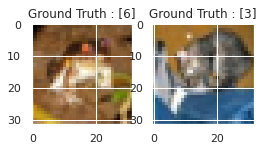

In [5]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

## Display images for each category

0


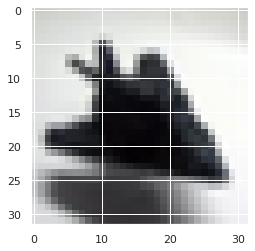

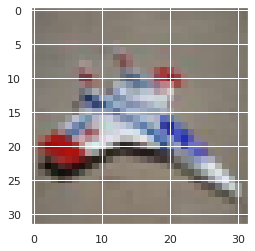

**************************************************
1


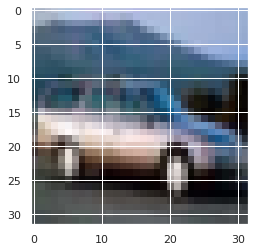

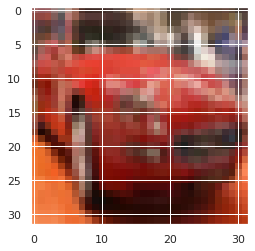

**************************************************
2


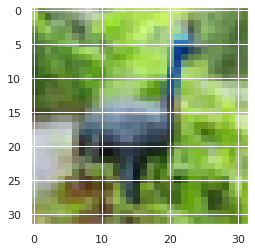

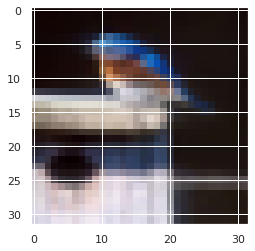

**************************************************
3


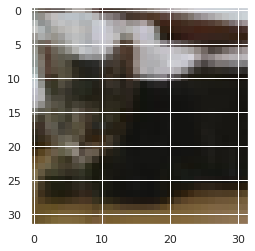

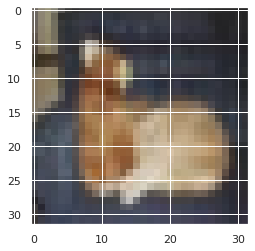

**************************************************
4


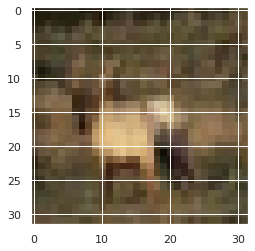

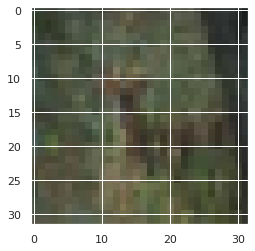

**************************************************
5


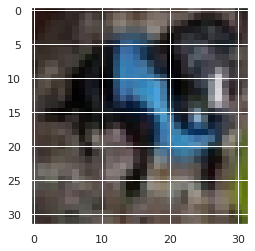

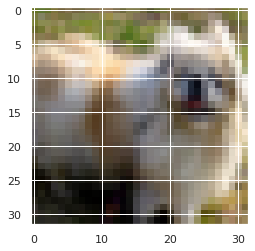

**************************************************
6


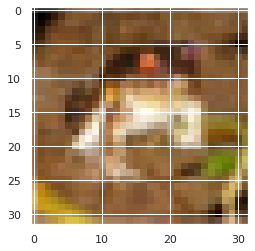

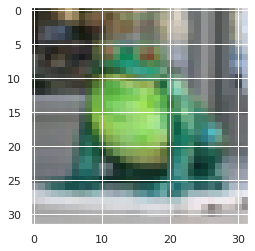

**************************************************
7


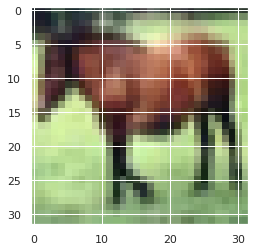

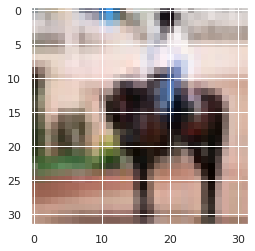

**************************************************
8


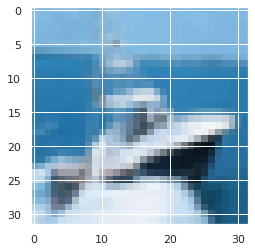

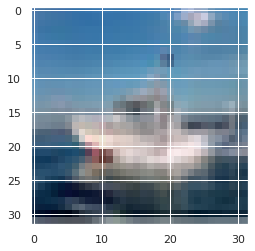

**************************************************
9


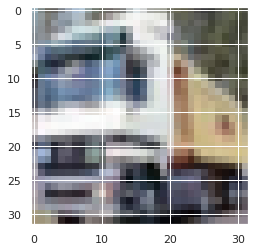

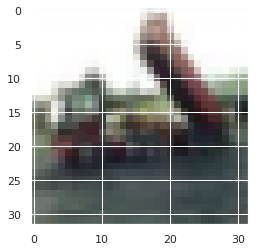

**************************************************


In [6]:
for category in np.unique(y_train):
  counter=2
  print(category)
  for idx, label in enumerate(y_train):
    if counter <1:
      break
    if label==category:
      
      counter-= 1
      plt.imshow(x_train[idx])
      plt.show()
  print("*"*50)

# Approach -1 - Using simple DNN or FC

In [7]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# train set / data 
x_train = x_train.reshape(-1, 32*32*3)
x_train = x_train.astype('float32') / 255



# test set / data 
x_test = x_test.reshape(-1, 32*32*3)
x_test = x_test.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

# test set / target 
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [8]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [9]:
#Models
model = Sequential()
model.add(Dense(800, input_dim=3072, activation="relu"))
model.add(Dense(10, activation="softmax"))

# For using custom metrics
# https://keras.io/api/metrics/#custom-metrics

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy",tf.keras.metrics.AUC()])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)
# https://keras.io/api/models/model_training_apis/

Epoch 1/5
250/250 [==============================] - 5s 10ms/step - loss: 1.9974 - accuracy: 0.2904 - auc: 0.7435 - val_loss: 1.8827 - val_accuracy: 0.3432 - val_auc: 0.7836
Epoch 2/5
250/250 [==============================] - 2s 8ms/step - loss: 1.8419 - accuracy: 0.3583 - auc: 0.7937 - val_loss: 1.8038 - val_accuracy: 0.3726 - val_auc: 0.8035
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7856 - accuracy: 0.3809 - auc: 0.8083 - val_loss: 1.7625 - val_accuracy: 0.3882 - val_auc: 0.8136
Epoch 4/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7467 - accuracy: 0.3959 - auc: 0.8180 - val_loss: 1.7416 - val_accuracy: 0.3880 - val_auc: 0.8167
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 1.7174 - accuracy: 0.4077 - auc: 0.8247 - val_loss: 1.7147 - val_accuracy: 0.4046 - val_auc: 0.8233


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               2458400   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 2,466,410
Trainable params: 2,466,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
history.history

{'accuracy': [0.2903600037097931,
  0.35830000042915344,
  0.3809199929237366,
  0.3959200084209442,
  0.4077399969100952],
 'auc': [0.7435173392295837,
  0.7936551570892334,
  0.8082573413848877,
  0.8180397152900696,
  0.8247133493423462],
 'loss': [1.9974480867385864,
  1.8419305086135864,
  1.7855725288391113,
  1.7466938495635986,
  1.7174471616744995],
 'val_accuracy': [0.3431999981403351,
  0.3725999891757965,
  0.3882000148296356,
  0.3880000114440918,
  0.40459999442100525],
 'val_auc': [0.7836068272590637,
  0.8034802079200745,
  0.8135594725608826,
  0.8167243003845215,
  0.8232808709144592],
 'val_loss': [1.8827219009399414,
  1.8038462400436401,
  1.7624986171722412,
  1.741645336151123,
  1.7146626710891724]}

Text(0.5, 1.0, 'Loss Curves')

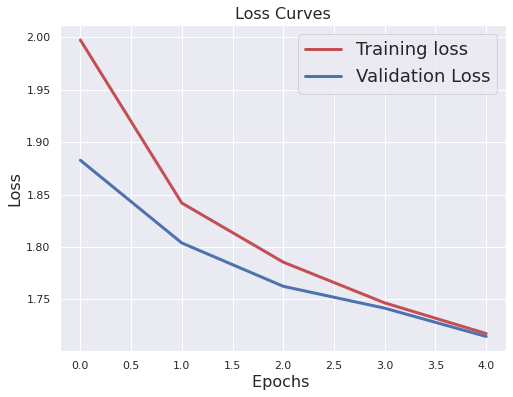

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

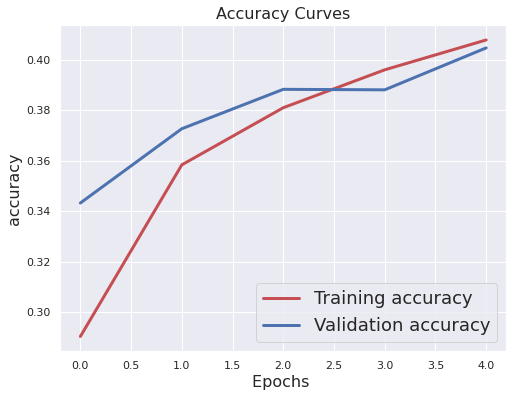

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'AUC Curves')

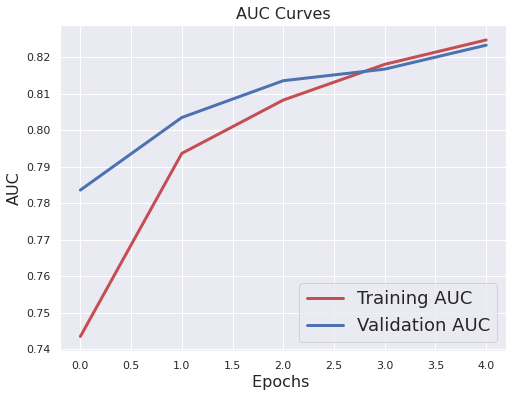

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['auc'],'r',linewidth=3.0)
plt.plot(history.history['val_auc'],'b',linewidth=3.0)
plt.legend(['Training AUC', 'Validation AUC'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('AUC',fontsize=16)
plt.title('AUC Curves',fontsize=16)

# Approach -2 : Using CNN

## Change the Datatype to Float and Normalize it

In [15]:
# Load the data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Normalize
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [16]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [17]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [18]:
num_classes= len(np.unique(y_train))

In [19]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation, Training and Test.

In [20]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [21]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [22]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


#  

## Build a CNN Architecture with KERAS

#### CNN using just the CONV layers

In [23]:
model=Sequential()
model.add(Conv2D(filters=9,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(filters=6,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=3,kernel_size=3,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 3)         165       
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 9)         252       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         492       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 3)         165       
_________________________________________________________________
flatten (Flatten)            (None, 2028)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               519424    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 522,903
Trainable params: 522,903
Non-trainable params: 0
________________________________________________

In [25]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 30s 13ms/step - loss: 2.2600 - accuracy: 0.1299 - val_loss: 2.1764 - val_accuracy: 0.2036
Epoch 2/5
225/225 [==============================] - 3s 12ms/step - loss: 2.0869 - accuracy: 0.2484 - val_loss: 2.0018 - val_accuracy: 0.2784
Epoch 3/5
225/225 [==============================] - 3s 11ms/step - loss: 1.9300 - accuracy: 0.3041 - val_loss: 1.8633 - val_accuracy: 0.3244
Epoch 4/5
225/225 [==============================] - 3s 12ms/step - loss: 1.8194 - accuracy: 0.3484 - val_loss: 1.7468 - val_accuracy: 0.3624
Epoch 5/5
225/225 [==============================] - 3s 12ms/step - loss: 1.7392 - accuracy: 0.3811 - val_loss: 1.6866 - val_accuracy: 0.4018


Text(0.5, 1.0, 'Accuracy Curves')

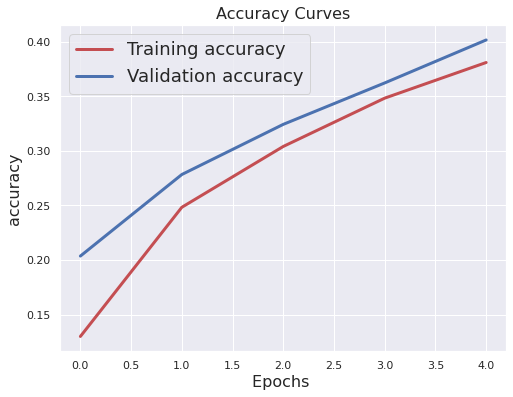

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

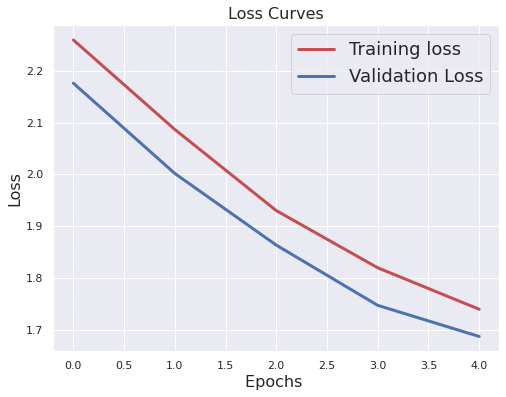

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#### CNN using CONV+ POOLING Layers

In [28]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [29]:
#Compile & Train the model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
                    batch_size=200, 
                    epochs=5,  
                    verbose=1)

Epoch 1/5
225/225 [==============================] - 3s 10ms/step - loss: 2.3021 - accuracy: 0.1091 - val_loss: 2.3007 - val_accuracy: 0.1246
Epoch 2/5
225/225 [==============================] - 2s 8ms/step - loss: 2.2995 - accuracy: 0.1472 - val_loss: 2.2975 - val_accuracy: 0.1714
Epoch 3/5
225/225 [==============================] - 2s 9ms/step - loss: 2.2951 - accuracy: 0.1765 - val_loss: 2.2913 - val_accuracy: 0.1954
Epoch 4/5
225/225 [==============================] - 2s 9ms/step - loss: 2.2860 - accuracy: 0.1817 - val_loss: 2.2771 - val_accuracy: 0.1970
Epoch 5/5
225/225 [==============================] - 2s 9ms/step - loss: 2.2618 - accuracy: 0.1840 - val_loss: 2.2345 - val_accuracy: 0.1820


Text(0.5, 1.0, 'Loss Curves')

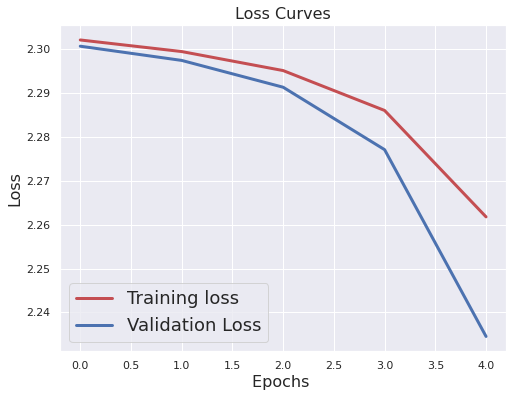

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

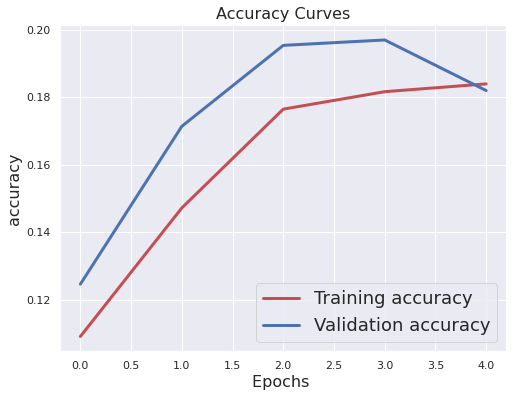

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Build a CNN Architecture with Tensorflow

In [32]:
import tensorflow as tf

In [33]:
del model
model= tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [34]:
x_train.shape,y_train.shape

((45000, 32, 32, 3), (45000, 10))

In [35]:
answers=model.fit(x_train,y_train,
                  validation_data=(x_valid,y_valid),
                  shuffle=True,epochs=2,verbose=2,batch_size=200)

Epoch 1/2
225/225 - 2s - loss: 2.0232 - accuracy: 0.2423 - val_loss: 1.7990 - val_accuracy: 0.3332
Epoch 2/2
225/225 - 1s - loss: 1.7363 - accuracy: 0.3615 - val_loss: 1.6479 - val_accuracy: 0.4082


### Stack an ANN on top of CNN

In [36]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.summary()

### Stack an ANN on top of CNN

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer='uniform'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

### Fit the model

In [37]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=2,verbose=2,batch_size=500)

Epoch 1/2
90/90 - 3s - loss: 2.0679 - accuracy: 0.1881 - val_loss: 1.8366 - val_accuracy: 0.2884
Epoch 2/2
90/90 - 1s - loss: 1.7681 - accuracy: 0.3226 - val_loss: 1.7111 - val_accuracy: 0.3486


### Evaluate the Results

In [38]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.7198 - accuracy: 0.3396


In [39]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

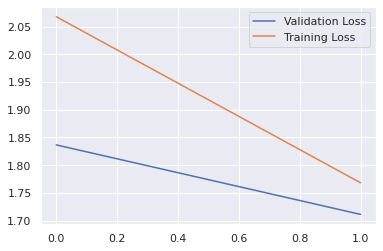

In [40]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

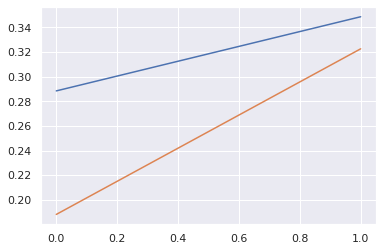

In [41]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;

# Approch -3 CNN

In [42]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 7s 14ms/step - loss: 1.5129 - accuracy: 0.4628 - val_loss: 1.2587 - val_accuracy: 0.5552
Epoch 2/8
450/450 [==============================] - 6s 14ms/step - loss: 1.1430 - accuracy: 0.5991 - val_loss: 1.0905 - val_accuracy: 0.6188
Epoch 3/8
450/450 [==============================] - 6s 14ms/step - loss: 0.9728 - accuracy: 0.6629 - val_loss: 1.0174 - val_accuracy: 0.6484
Epoch 4/8
450/450 [==============================] - 6s 14ms/step - loss: 0.8514 - accuracy: 0.7045 - val_loss: 1.0003 - val_accuracy: 0.6560
Epoch 5/8
450/450 [==============================] - 6s 14ms/step - loss: 0.7596 - accuracy: 0.7375 - val_loss: 1.0021 - val_accuracy: 0.6580
Epoch 6/8
450/450 [==============================] - 6s 14ms/step - loss: 0.6682 - accuracy: 0.7703 - val_loss: 1.0266 - val_accuracy: 0.6504
Epoch 7/8
450/450 [==============================] - 6s 14ms/step - loss: 0.5835 - accuracy: 0.8015 - val_loss: 1.0828 - val_accuracy: 0.6514
Epoch 

# CNN - Experiment - 4

In [43]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(MaxPool2D(pool_size=2))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(x_train,y_train,validation_data=(x_valid,y_valid), batch_size=100, epochs=8)

Epoch 1/8
450/450 [==============================] - 5s 9ms/step - loss: 1.7349 - accuracy: 0.3669 - val_loss: 1.4703 - val_accuracy: 0.4802
Epoch 2/8
450/450 [==============================] - 4s 9ms/step - loss: 1.3857 - accuracy: 0.5042 - val_loss: 1.3257 - val_accuracy: 0.5392
Epoch 3/8
450/450 [==============================] - 5s 10ms/step - loss: 1.2517 - accuracy: 0.5576 - val_loss: 1.1804 - val_accuracy: 0.5860
Epoch 4/8
450/450 [==============================] - 5s 10ms/step - loss: 1.1704 - accuracy: 0.5889 - val_loss: 1.1412 - val_accuracy: 0.6046
Epoch 5/8
450/450 [==============================] - 5s 10ms/step - loss: 1.1114 - accuracy: 0.6082 - val_loss: 1.1074 - val_accuracy: 0.6132
Epoch 6/8
450/450 [==============================] - 5s 10ms/step - loss: 1.0627 - accuracy: 0.6279 - val_loss: 1.0628 - val_accuracy: 0.6348
Epoch 7/8
450/450 [==============================] - 5s 10ms/step - loss: 1.0302 - accuracy: 0.6405 - val_loss: 1.0204 - val_accuracy: 0.6522
Epoch 8/

# Alternative Approach
https://www.kaggle.com/aayushkubba/cifar-10-analysis-with-a-neural-network

## Data Augmentation 
To get a more generalised model

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, vertical_flip=True,
    validation_split=0.2)

In [46]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [47]:
from keras.layers import Conv2D, Flatten
augmented_simple_cnn_model = Sequential()
augmented_simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'))
augmented_simple_cnn_model.add(MaxPool2D(pool_size=2))
augmented_simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
augmented_simple_cnn_model.add(MaxPool2D(pool_size=2))
augmented_simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
augmented_simple_cnn_model.add(Flatten())
augmented_simple_cnn_model.add(Dense(10, activation='softmax'))


In [48]:
augmented_simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
augmented_simple_cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [50]:
augmented_simple_cnn_model_history=augmented_simple_cnn_model.fit_generator(datagen.flow(x_train,y_train,batch_size=256),
                                                                            validation_data=(x_valid,y_valid),
                                                                            epochs=8)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
176/176 [==============================] - 29s 163ms/step - loss: 2.0051 - accuracy: 0.2455 - val_loss: 1.8103 - val_accuracy: 0.3188
Epoch 2/8
176/176 [==============================] - 28s 160ms/step - loss: 1.7949 - accuracy: 0.3300 - val_loss: 1.6906 - val_accuracy: 0.3652
Epoch 3/8
176/176 [==============================] - 28s 161ms/step - loss: 1.7295 - accuracy: 0.3566 - val_loss: 1.7348 - val_accuracy: 0.3644
Epoch 4/8
176/176 [==============================] - 28s 162ms/step - loss: 1.6892 - accuracy: 0.3732 - val_loss: 1.6755 - val_accuracy: 0.3856
Epoch 5/8
176/176 [==============================] - 29s 162ms/step - loss: 1.6600 - accuracy: 0.3874 - val_loss: 1.6162 - val_accuracy: 0.4008
Epoch 6/8
176/176 [==============================] - 29s 165ms/step - loss: 1.6308 - accuracy: 0.4021 - val_loss: 1.5758 - val_accuracy: 0.4102
Epoch 7/8
176/176 [==============================] - 29s 164ms/step - loss: 1.6019 - accuracy: 0.4112 - val_loss: 1.5338 - val_accuracy:

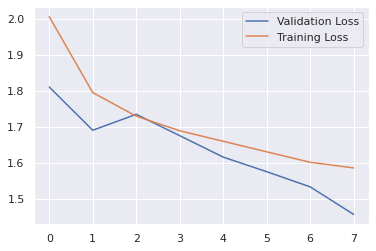

In [51]:
plt.plot(augmented_simple_cnn_model_history.history['val_loss'],label='Validation Loss');
plt.plot(augmented_simple_cnn_model_history.history['loss'],label='Training Loss');
plt.legend();

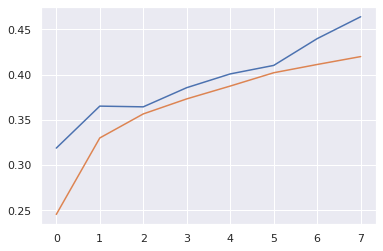

In [52]:
plt.plot(augmented_simple_cnn_model_history.history['val_accuracy'],label='Validation Accuracy');
plt.plot(augmented_simple_cnn_model_history.history['accuracy'],label='Training Accuracy');
plt.legend;

# Transfer Learning

## RESNET

In [53]:
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout

In [54]:
# RESNET as the base model
base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)

# We will only use resnet for feature extarction, freeze all the layers that we dont need
for layer in base_model.layers:
  layer.trainable=False

# Take the output output of the base layers
base_model_output=base_model.output

# Add our layers
## Pooling
x=GlobalAveragePooling2D()(base_model_output)
## FC
x=Dense(2056,activation='relu')(x)
## Dropout
x=Dropout(0.5)(x)
## Output layer
x=Dense(10,activation='softmax')(x)

94781440/94765736 [==============================] - 1s 0us/step


In [55]:
resnet_model=Model(inputs=base_model.input,outputs=x)

In [56]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [57]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

For reference

Without freezing

Epoch 1/8
176/176 [==============================] - 50s 238ms/step - loss: 1.4530 - accuracy: 0.5499 - val_loss: 4.2816 - val_accuracy: 0.1038
Epoch 2/8

In [59]:
resnet_model_history=resnet_model.fit(x_train,y_train,batch_size=256,
                                      validation_data=(x_valid,y_valid),epochs=4,shuffle=True)

Epoch 1/4
176/176 [==============================] - 22s 96ms/step - loss: 2.3252 - accuracy: 0.1971 - val_loss: 2.0100 - val_accuracy: 0.2700
Epoch 2/4
176/176 [==============================] - 13s 76ms/step - loss: 2.0098 - accuracy: 0.2628 - val_loss: 1.9381 - val_accuracy: 0.2896
Epoch 3/4
176/176 [==============================] - 13s 76ms/step - loss: 1.9690 - accuracy: 0.2762 - val_loss: 1.8977 - val_accuracy: 0.3228
Epoch 4/4
176/176 [==============================] - 13s 77ms/step - loss: 1.9488 - accuracy: 0.2876 - val_loss: 1.8994 - val_accuracy: 0.3206


# VGGNET

In [61]:
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization

In [62]:


# RESNET as the base model
base_model=tf.keras.applications.VGG16(weights='imagenet',include_top=False)

# We will only use resnet for feature extarction, freeze all the layers that we dont need
for layer in base_model.layers:
  layer.trainable=False

# Take the output output of the base layers
base_model_output=base_model.output

# Add our layers
## Pooling
x=GlobalAveragePooling2D()(base_model_output)
## FC
x=Dense(2056,activation='relu')(x)
## BAtch Normalisation - For Speed
x=  BatchNormalization()(x)
## Dropout
x=Dropout(0.5)(x)
## Output layer
x=Dense(10,activation='softmax')(x)

58900480/58889256 [==============================] - 1s 0us/step


In [63]:
vgg_model=Model(inputs=base_model.input,outputs=x)

In [64]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg_model_history=vgg_model.fit(x_train,y_train,batch_size=256,
                                      validation_data=(x_valid,y_valid),epochs=40,shuffle=True)

Epoch 1/40
176/176 [==============================] - 12s 71ms/step - loss: 1.1518 - accuracy: 0.5968 - val_loss: 1.1623 - val_accuracy: 0.5992
Epoch 2/40
176/176 [==============================] - 12s 71ms/step - loss: 1.1361 - accuracy: 0.6003 - val_loss: 1.1809 - val_accuracy: 0.5882
Epoch 3/40
176/176 [==============================] - 13s 71ms/step - loss: 1.1169 - accuracy: 0.6064 - val_loss: 1.1435 - val_accuracy: 0.5986
Epoch 4/40
176/176 [==============================] - 12s 71ms/step - loss: 1.1011 - accuracy: 0.6147 - val_loss: 1.1503 - val_accuracy: 0.6046
Epoch 5/40
176/176 [==============================] - 12s 70ms/step - loss: 1.0844 - accuracy: 0.6202 - val_loss: 1.1538 - val_accuracy: 0.5988
Epoch 6/40
123/176 [===================>..........] - ETA: 3s - loss: 1.0666 - accuracy: 0.6253